***
# IRIS FLOWER CLASSIFICATION (CODSOFT TASK_03)
***

In [1]:
import pandas as pd
import numpy as np
import cv2

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from itertools import combinations
import missingno


# modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
# Specify the Kaggle dataset path and read the csv file
ds = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
print(ds)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data exploration

In [4]:
ds.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
ds.isnull().sum().sort_values(ascending = False) 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
ds.shape

(150, 5)

In [8]:
ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
ds.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [10]:
ds.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
ds.sepal_length.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [12]:
ds.sepal_width.unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [13]:
ds.petal_length.unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [14]:
ds.petal_width.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

# Data Visualization

In [15]:
figg = px.histogram(data_frame=ds, x='species', title='total no of species', color='species')

figg.show()

In [16]:
def Histogram(column):
    global ds

    # Create a histogram using plotly.graph_objects
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=ds[column], marker_color='skyblue', marker_line_color='black', marker_line_width=1.5))

    fig.update_layout(title=f'Histogram of {column}',
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      template='plotly_dark')

    fig.show()

In [18]:
Histogram('sepal_length')

In [19]:
Histogram('petal_length')

In [20]:
Histogram('sepal_width')

In [21]:
Histogram('petal_width')

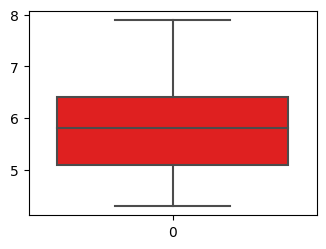

In [22]:
plt.subplot(2,2,1)
sns.boxplot(ds['sepal_length'],color='red')

plt.tight_layout()
plt.show()

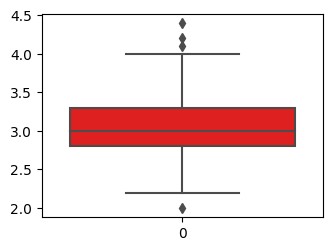

In [23]:
plt.subplot(2,2,2)
sns.boxplot(ds['sepal_width'],color='red')

plt.tight_layout()
plt.show()

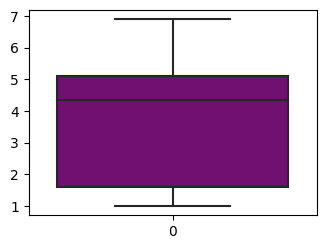

In [24]:
plt.subplot(2,2,3)
sns.boxplot(ds['petal_length'],color='purple')

plt.tight_layout()
plt.show()

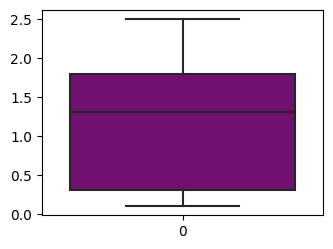

In [25]:
plt.subplot(2,2,4)
sns.boxplot(ds['petal_width'],color='purple')

plt.tight_layout()
plt.show()

In [27]:
fig1 = px.histogram(ds, x="species", color="sepal_length")  
fig1.show()  

In [28]:
fig2 = px.histogram(ds, x="species", color="sepal_width")  
fig2.show()  

In [29]:
fig3 = px.histogram(ds, x="species", color="petal_width")  
fig3.show()  

In [30]:
fig4= px.histogram(ds, x="species", color="petal_length")  
fig4.show()  

In [31]:
def Scatterplot(x, y, c=None):
    global ds
    
    plt.figure(figsize=(15, 6))
    for species in ds['species'].unique():
        plt.scatter(ds[x][ds['species'] == species], ds[y][ds['species'] == species], label=species, edgecolor="k", alpha=0.7)
    plt.xticks(rotation=0)
    
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

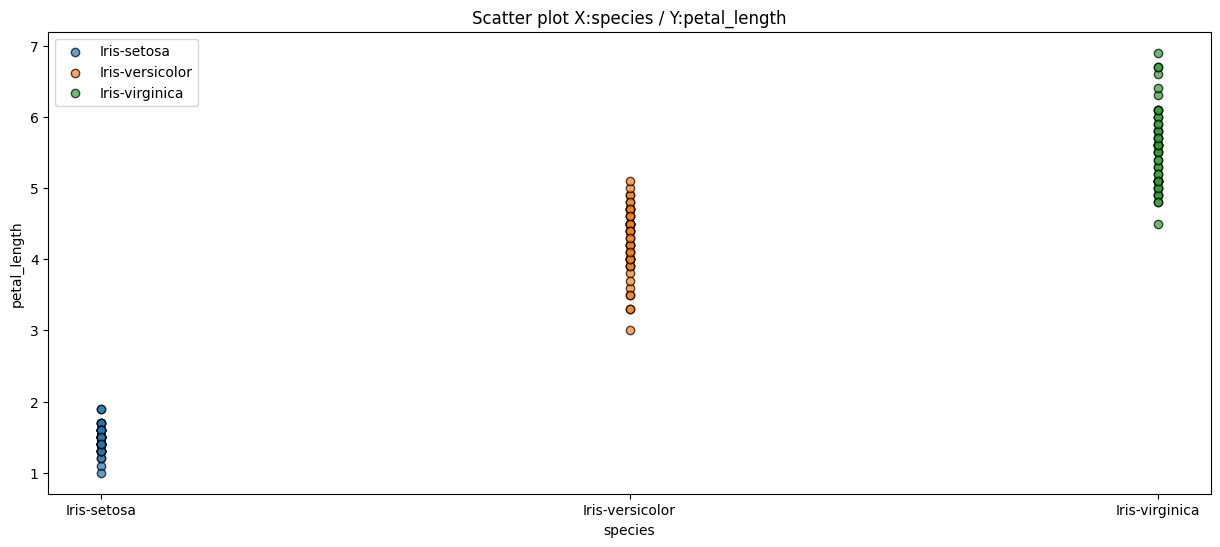

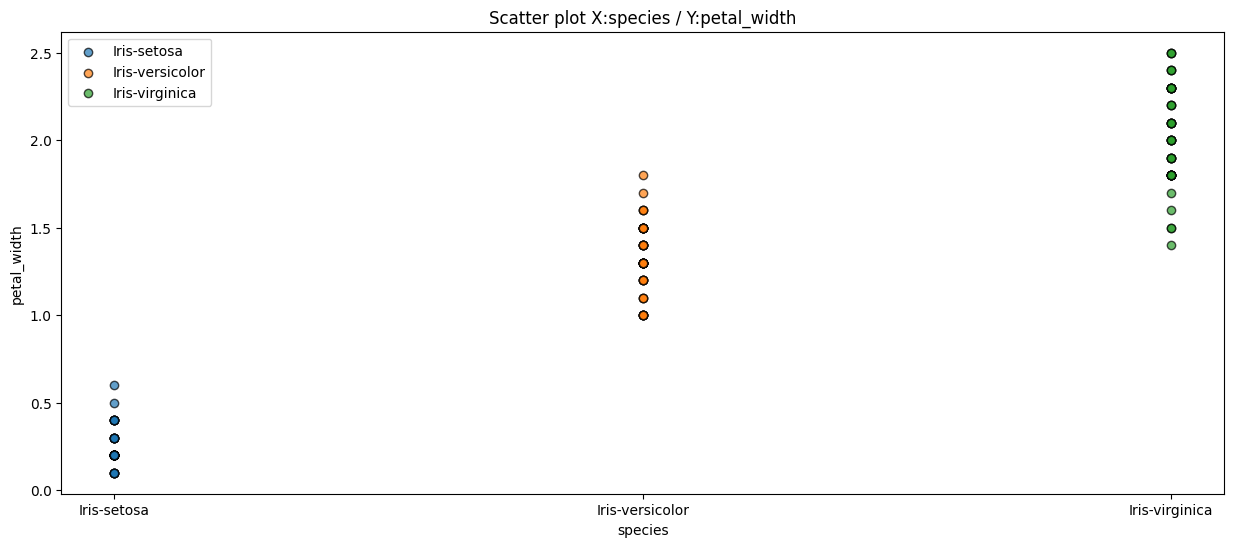

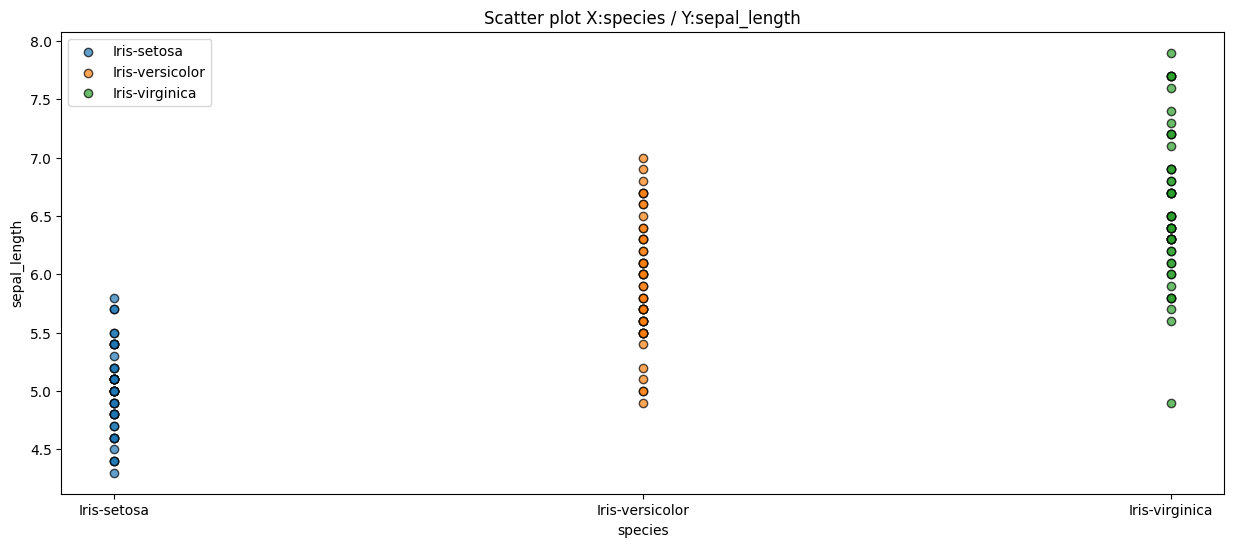

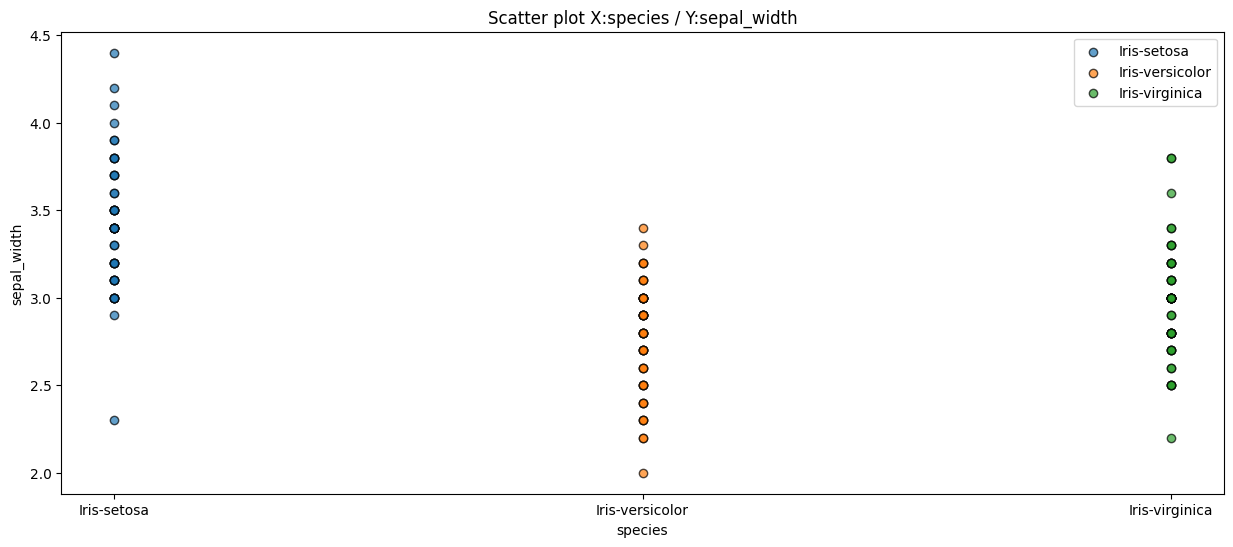

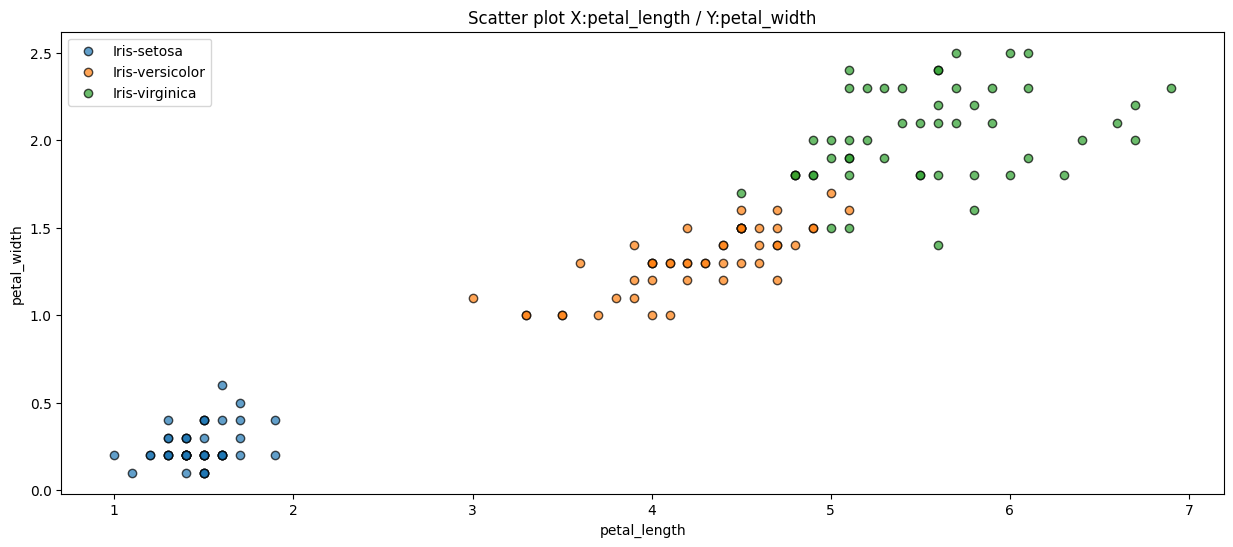

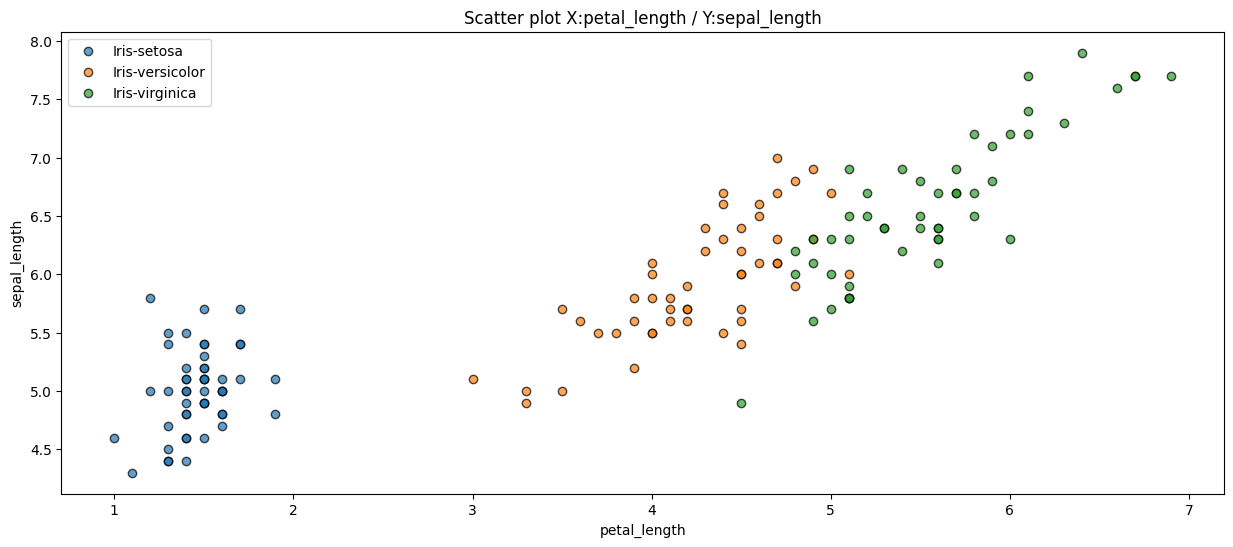

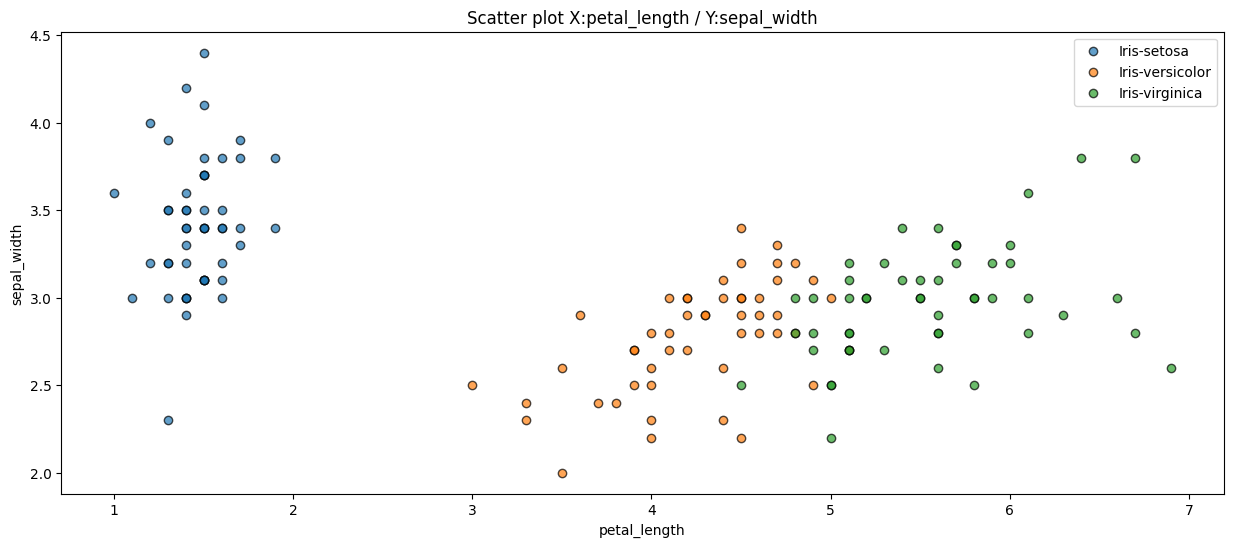

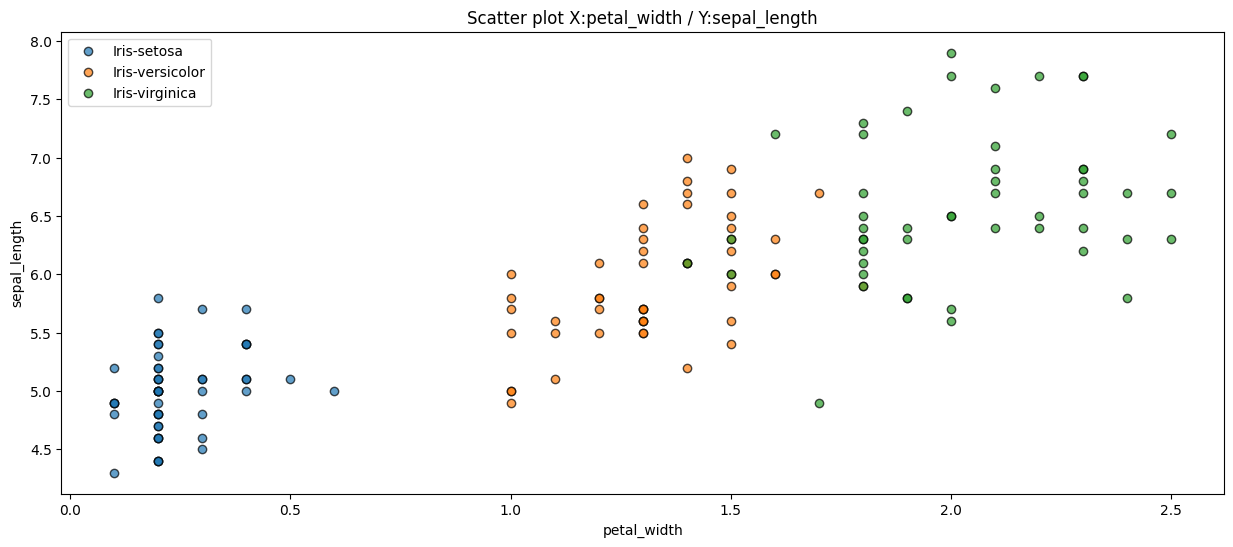

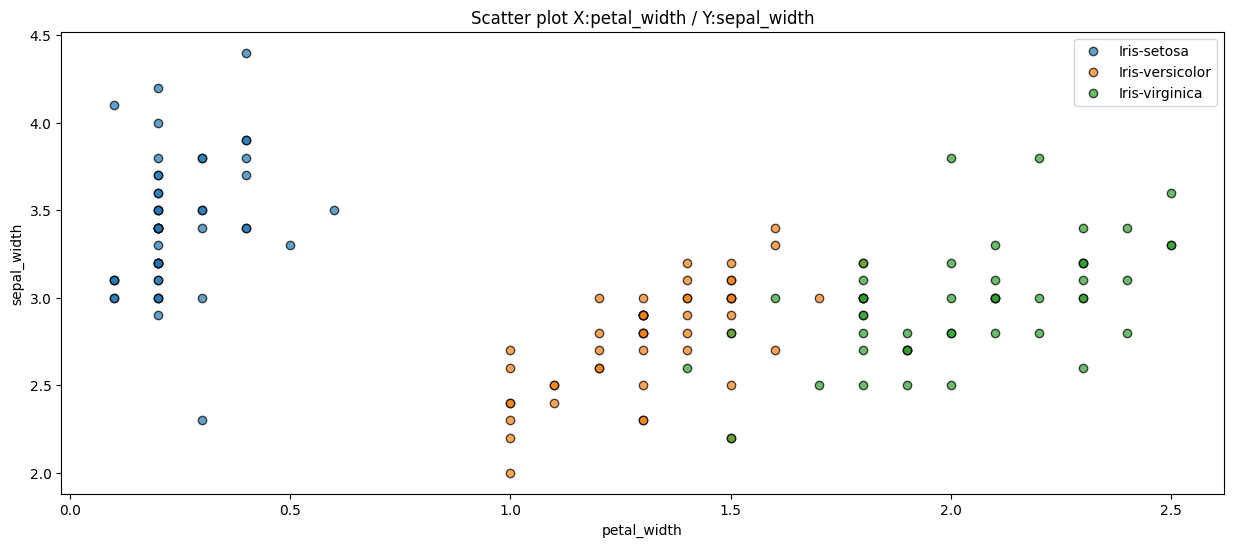

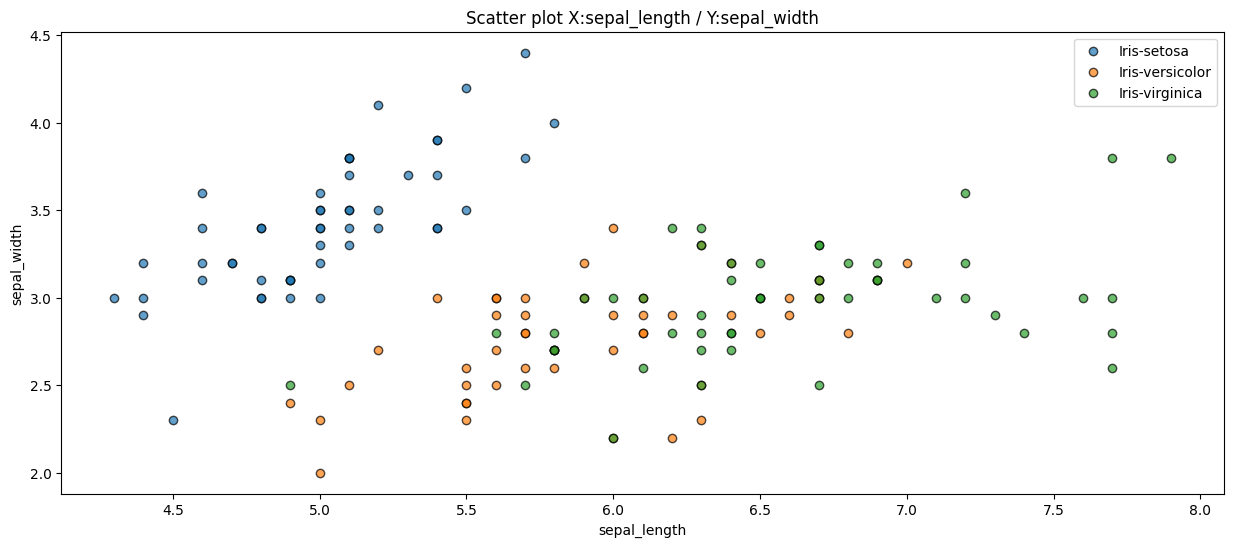

In [32]:
comb = combinations(["species", "petal_length", "petal_width", "sepal_length", "sepal_width"], 2)
comb_list = [list(i) for i in comb]

for col in comb_list:
    Scatterplot(col[0], col[1])

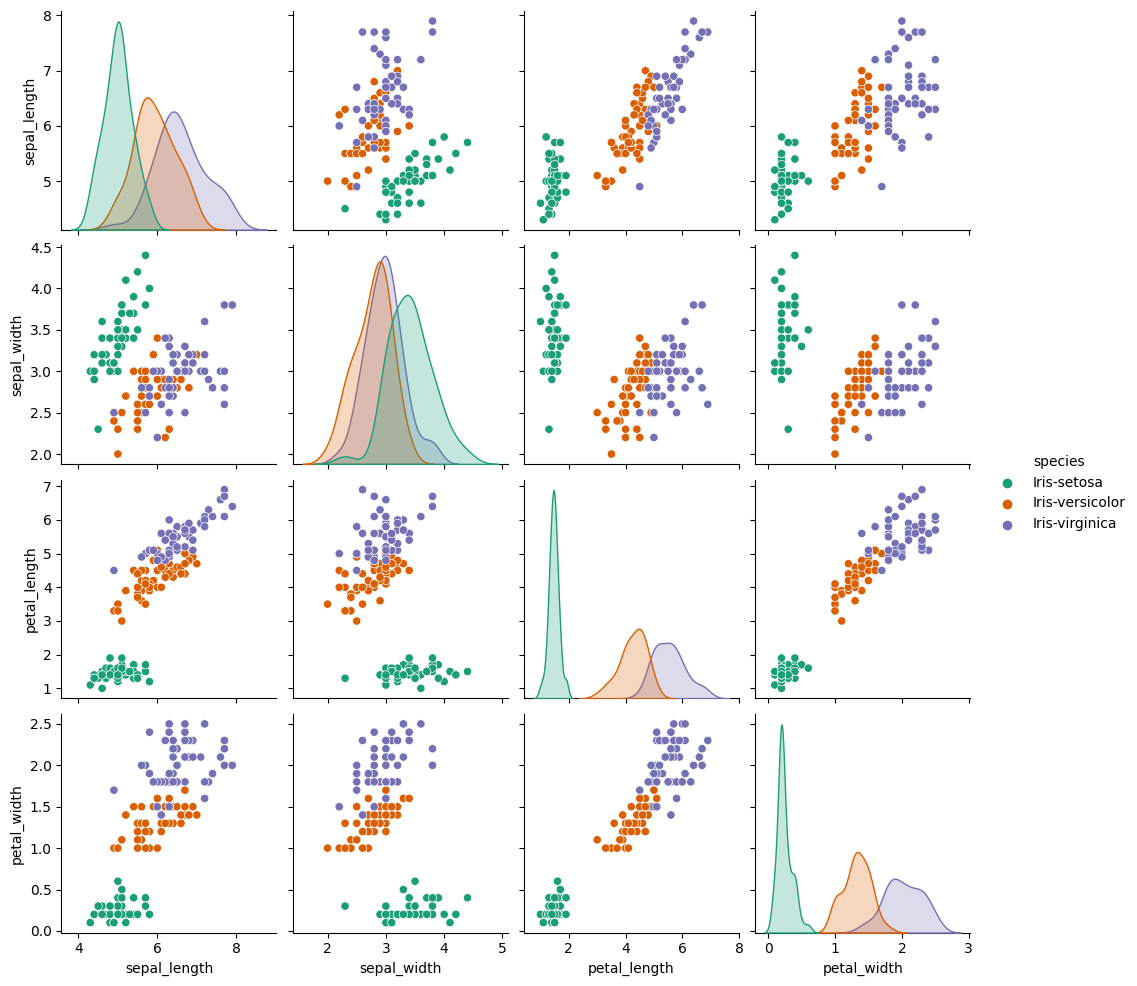

In [34]:
sns.pairplot(ds,hue='species',palette='Dark2');

In [35]:
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Refinement

In [37]:
ds.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
species_encoding = ds.groupby('species').agg({'sepal_length': 'mean'}).to_dict()
ds['species_encoded'] = round(ds['species'].map(species_encoding['sepal_length']), 1)
ds.species_encoded.unique()

array([5. , 5.9, 6.6])

In [39]:
ds.drop(['species'],axis=1, inplace=True)

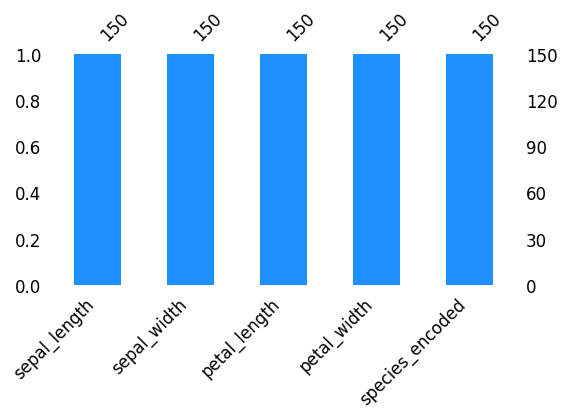

In [40]:
missingno.bar(ds, color="dodgerblue", sort="ascending", figsize=(6,3), fontsize=12);

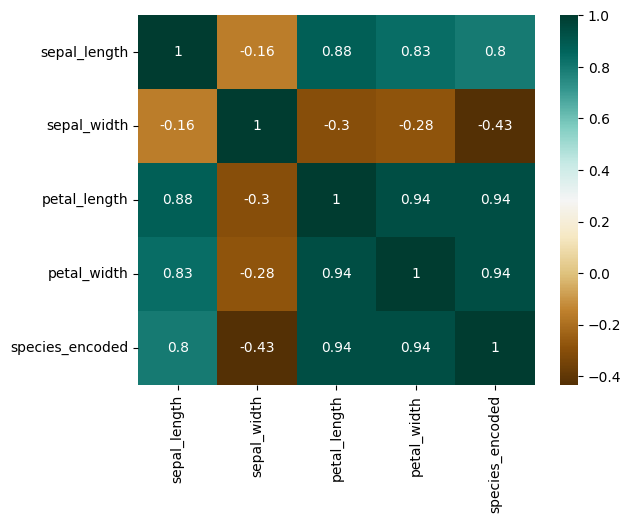

In [41]:
sns.heatmap(ds.corr(method='spearman'),annot=True,cmap="BrBG");

In [42]:
X = ds.drop(['species_encoded'], axis=1)
y = ds['species_encoded']

In [43]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y.head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: species_encoded, dtype: float64

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state= 32)  #Splitting train and test set

# Models Implementation

### 1) Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
print('Mean Squared Error (Linear Regression - Test):',   mean_squared_error(y_test, lr_pred_test))
print('Mean Absolute Error  (Linear Regression - Test): ',mean_absolute_error(y_test, lr_pred_test))
print('R2 score (Linear Regression - Train): ',           r2_score(y_train,lr_pred_train))
print('R2 Score (Linear Regression - Test):',             r2_score(y_test,lr_pred_test))

Mean Squared Error (Linear Regression - Test): 0.02146739786178181
Mean Absolute Error  (Linear Regression - Test):  0.11699085779863634
R2 score (Linear Regression - Train):  0.9502602757370918
R2 Score (Linear Regression - Test): 0.9521351218243438


### 2) Random Forest Regressor

In [48]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
rf_pred_train = rfg.predict(X_train)
rf_pred_test = rfg.predict(X_test)
print('Mean Squared Error (Random Forest - Test):',mean_squared_error(y_test, rf_pred_test))
print('Mean Absolute Error  (Random Forest - Test): ',mean_absolute_error(y_test, rf_pred_test))
print('R2 score (Random Forest - Train): ',r2_score(y_train,rf_pred_train))
print('R2 Score (Random Forest - Test):',r2_score(y_test,rf_pred_test))

Mean Squared Error (Random Forest - Test): 0.004614166666666412
Mean Absolute Error  (Random Forest - Test):  0.023566666666668172
R2 score (Random Forest - Train):  0.9923012042837274
R2 Score (Random Forest - Test): 0.9897120029728731


### 3) XGBoost Regressor(GradientBoosting)

In [50]:
# Create and train the XGBoost Regressor model
xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgboost_train = xgboost.predict(X_train)
y_pred_xgboost_test = xgboost.predict(X_test)
print('Mean Squared Error (xgboost - Test):', mean_squared_error(y_test, y_pred_xgboost_test))
print('Mean Absolute Error  (xgboost - Test): ',mean_absolute_error(y_test, y_pred_xgboost_test))
print('R2 score (xgboost - Train): ', r2_score(y_train, y_pred_xgboost_train))
print('R2 Score (xgboost - Test):', r2_score(y_test,y_pred_xgboost_test))

Mean Squared Error (xgboost - Test): 0.003198065546287267
Mean Absolute Error  (xgboost - Test):  0.017760848999023436
R2 score (xgboost - Train):  0.9999982413686422
R2 Score (xgboost - Test): 0.9928694190718232


### 4) Decision Tree

In [51]:
dt = DecisionTreeRegressor(max_depth=10,random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print('Mean Squared Error (Decision Tree - Test):',mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error  (Decision Tree - Test): ',mean_absolute_error(y_test, y_pred_test))
print('R2 score (Decision Tree - Train): ',r2_score(y_train,y_pred))
print('R2 Score (Decision Tree - Test):',r2_score(y_test,y_pred_test))

Mean Squared Error (Decision Tree - Test): 5.075005156921843e-30
Mean Absolute Error  (Decision Tree - Test):  1.6283271027835629e-15
R2 score (Decision Tree - Train):  1.0
R2 Score (Decision Tree - Test): 1.0


# Prediction & Visualize Evaluation

In [53]:
# Evaluate Linear Regression
mae_lr_train = mean_absolute_error(y_train, lr_pred_train)
mae_lr_test = mean_absolute_error(y_test, lr_pred_test)
mse_lr_train = mean_squared_error(y_train, lr_pred_train)
mse_lr_test = mean_squared_error(y_test, lr_pred_test)

# Evaluate Random Forest Regressor
mae_rf_train = mean_absolute_error(y_train, rf_pred_train)
mae_rf_test = mean_absolute_error(y_test, rf_pred_test)
mse_rf_train = mean_squared_error(y_train, rf_pred_train)
mse_rf_test = mean_squared_error(y_test, rf_pred_test)

# Evaluate Decision Tree Regressor
mae_dt_train = mean_absolute_error(y_train, y_pred)
mae_dt_test = mean_absolute_error(y_test, y_pred_test)
mse_dt_train = mean_squared_error(y_train, y_pred)
mse_dt_test = mean_squared_error(y_test, y_pred_test)

# Evaluate xgboost Regressor
mae_xg_train = mean_absolute_error(y_train, y_pred_xgboost_train)
mae_xg_test = mean_absolute_error(y_test, y_pred_xgboost_test)
mse_xg_train = mean_squared_error(y_train, y_pred_xgboost_train)
mse_xg_test = mean_squared_error(y_test, y_pred_xgboost_test)

In [54]:
# Create DataFrames for plotting
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'decision tree','xgboost Regressor'],
    'MAE Train': [mae_lr_train, mae_rf_train,mae_dt_train,mae_xg_train],
    'MAE Test': [mae_lr_test, mae_rf_test, mae_dt_test,mae_xg_test],
    'MSE Train': [mse_lr_train, mse_rf_train, mse_dt_train,mse_xg_train],
    'MSE Test': [mse_lr_test, mse_rf_test, mse_dt_test,mse_xg_test]
})

In [55]:
# Plotting MAE
fig_mae = px.bar(metrics_df, x='Model', y=['MAE Train', 'MAE Test'],
                 title='Mean Absolute Error (MAE)',
                 labels={'value': 'MAE', 'variable': 'Dataset'},
                 color_discrete_map={'MAE Train': 'blue', 'MAE Test': 'red'})
fig_mae.update_layout(barmode='group')

# Show the plots
fig_mae.show()

In [56]:
# Plotting MSE
fig_mse = px.bar(metrics_df, x='Model', y=['MSE Train', 'MSE Test'],
                 title='Mean Squared Error (MSE)',
                 labels={'value': 'MSE', 'variable': 'Dataset'},
                 color_discrete_map={'MSE Train': 'blue', 'MSE Test': 'red'})
fig_mse.update_layout(barmode='group')

fig_mse.show()

In [57]:
scatter_color = 'skyblue'
plot_width = 800
plot_height = 275

# Scatter plot for Training Set
fig_train = px.scatter(x=y_train, y=y_pred_xgboost_train, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                       title='Evaluation of Training xgboost Regressor Model', trendline='ols',
                       color_discrete_sequence=[scatter_color])
fig_train.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Scatter plot for Testing Set
fig_test = px.scatter(x=y_test, y=y_pred_xgboost_test, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                      title='Evaluation of Testing xgboost Regressor Model', trendline='ols',
                      color_discrete_sequence=[scatter_color])
fig_test.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Show the plots
fig_train.show()
fig_test.show()

In [58]:
scatter_color = 'skyblue'
plot_width = 800
plot_height = 275

# Scatter plot for Training Set
fig_train = px.scatter(x=y_train, y=rf_pred_train, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                       title='Evaluation of Training xgboost Model', trendline='ols',
                       color_discrete_sequence=[scatter_color])
fig_train.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Scatter plot for Testing Set
fig_test = px.scatter(x=y_test, y=rf_pred_test, labels={'x': 'Actual Ratings', 'y': 'Predicted Ratings'},
                      title='Evaluation of Testing xgboost Model', trendline='ols',
                      color_discrete_sequence=[scatter_color])
fig_test.update_layout(showlegend=True, width=plot_width, height=plot_height)

# Show the plots
fig_train.show()
fig_test.show()

In [59]:
# Create a prediction dataframe by Random Forest Regressor Model
prediction_xgboost = pd.DataFrame({'actual_species': y_test,
                        'predicted_species': y_pred_xgboost_test.ravel(),
                        'residual': y_test - y_pred_xgboost_test}
                      )
prediction_xgboost.head(10)

,actual_species,predicted_species,residual
55,5.9,5.900010,-0.000010
22,5.0,5.000022,-0.000022
26,5.0,5.000022,-0.000022
56,5.9,6.004890,-0.104890
134,6.6,6.516637,0.083363
131,6.6,6.600221,-0.000221
23,5.0,5.000022,-0.000022
34,5.0,5.000331,-0.000331
85,5.9,5.892816,0.007184
21,5.0,5.000022,-0.000022
